# Imports

In [23]:
from src.utils import load_data
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# autoreload
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [ ]:
file_path = "raw_data/joueurs_ligue1_2024_2025.csv"
data = load_data(file_path)
data.head()

Data loaded successfully from raw_data/joueurs_ligue1_2024_2025.csv


,equipe,player_id,player_name,player_country_code,age,positions,matches_played,starts,min,gls,...,fls_com,fls_drawn,offside,pk_won,pk_conceded,og,ball_recov,air_dual_won,air_dual_lost,pct_air_dual_won
0,Angers,c3e4ecbb,Jordan Lefort,FRA,30.0,DF,34,34,3060.0,0.0,...,14.0,15.0,1.0,0.0,1.0,0.0,110.0,40.0,28.0,58.8
1,Angers,9d420dad,Yahia Fofana,CIV,23.0,GK,33,33,2970.0,0.0,...,0.0,11.0,0.0,0.0,0.0,0.0,36.0,6.0,3.0,66.7
2,Angers,7978cbf0,Himad Abdelli,ALG,24.0,"MF,FW",32,32,2842.0,6.0,...,48.0,32.0,3.0,0.0,0.0,0.0,193.0,13.0,20.0,39.4
3,Angers,6bfb4303,Florent Hanin,ALG,34.0,DF,33,31,2672.0,1.0,...,16.0,35.0,1.0,0.0,0.0,0.0,132.0,15.0,28.0,34.9
4,Angers,48b28bfd,Jean-Eudes Aholou,CIV,30.0,MF,26,26,1959.0,2.0,...,50.0,25.0,1.0,0.0,0.0,0.0,100.0,38.0,23.0,62.3


In [48]:
initial_cols = data.columns.tolist()
initial_cols

['equipe',
 'player_id',
 'player_name',
 'player_country_code',
 'age',
 'positions',
 'matches_played',
 'starts',
 'min',
 'gls',
 'ast',
 'gls_and_ast',
 'non_pen_gls',
 'xg',
 'non_pen_xg',
 'xag',
 'pk_made',
 'pk_att',
 'yellow_cards',
 'red_cards',
 'carries_prog',
 'passes_prog',
 'per90_gls',
 'per90_ast',
 'per90_non_pen_gls',
 'per90_xg',
 'per90_xag',
 'per90_non_pen_xg',
 'sh',
 'sot',
 'pct_sot',
 'per90_sh',
 'per90_sot',
 'gls_per_sh',
 'gls_per_sot',
 'avg_sh_dist',
 'fk_sh',
 'npxg_per_sh',
 'gls_xg_diff',
 'non_pen_gls_xg_diff',
 'pass_cmp',
 'pass_att',
 'pct_pass_cmp',
 'pass_ttl_dist',
 'pass_cmp_s',
 'pass_att_s',
 'pct_pass_cmp_s',
 'pass_cmp_m',
 'pass_att_m',
 'pct_pass_cmp_m',
 'pass_cmp_l',
 'pass_att_l',
 'pct_pass_cmp_l',
 'xa',
 'ast_xag_diff',
 'pass_prog',
 'pass_prog_ttl_dist',
 'key_passes',
 'pass_fthird',
 'pass_opp_box',
 'cross_opp_box',
 'pass_live',
 'pass_dead',
 'pass_fk',
 'through_balls',
 'switches',
 'crosses',
 'pass_offside',
 'pass_blo

In [57]:
# print all the possible values of data['position']
data['positions'].value_counts()

positions
DF       197
MF       130
FW       100
GK        66
FW,MF     64
MF,FW     49
DF,MF     30
MF,DF     17
DF,FW     10
FW,DF      3
Name: count, dtype: int64

## Initial Filtering

In [25]:
# KEEP PLAYERS WHO HAVE PLAYED MORE THAN X MINUTES

min_player_threshold = 500
col_minutes = 'min'
data[col_minutes] = pd.to_numeric(data[col_minutes], errors='coerce')
data_clean = data.dropna(subset=[col_minutes])

data_clean = data_clean[data_clean[col_minutes] > min_player_threshold]

print(f"Number of players with more than {min_player_threshold} minutes played: {data_clean.shape[0]}")

# DUPLICATE player_id DETECTION

if data_clean.duplicated(subset=["player_id"]).any():
    n_dupes = data_clean.duplicated(subset=["player_id"]).sum()
    print(f"{n_dupes} duplicates found on 'player_id'.")
    data_clean = (
        data_clean.sort_values(by="min", ascending=False)
            .drop_duplicates(subset=["player_id"], keep="first")
    )
else:
    print("No duplicates found on 'player_id' ✅")

print(f"Number of players with more than {min_player_threshold} minutes played & without duplicates: {data_clean.shape[0]}")

Number of players with more than 500 minutes played: 361
5 duplicates found on 'player_id'.
Number of players with more than 500 minutes played & without duplicates: 356


In [26]:
# List all columns names
data.columns.tolist()

['equipe',
 'player_id',
 'player_name',
 'player_country_code',
 'age',
 'positions',
 'matches_played',
 'starts',
 'min',
 'gls',
 'ast',
 'gls_and_ast',
 'non_pen_gls',
 'xg',
 'non_pen_xg',
 'xag',
 'pk_made',
 'pk_att',
 'yellow_cards',
 'red_cards',
 'carries_prog',
 'passes_prog',
 'per90_gls',
 'per90_ast',
 'per90_non_pen_gls',
 'per90_xg',
 'per90_xag',
 'per90_non_pen_xg',
 'sh',
 'sot',
 'pct_sot',
 'per90_sh',
 'per90_sot',
 'gls_per_sh',
 'gls_per_sot',
 'avg_sh_dist',
 'fk_sh',
 'npxg_per_sh',
 'gls_xg_diff',
 'non_pen_gls_xg_diff',
 'pass_cmp',
 'pass_att',
 'pct_pass_cmp',
 'pass_ttl_dist',
 'pass_cmp_s',
 'pass_att_s',
 'pct_pass_cmp_s',
 'pass_cmp_m',
 'pass_att_m',
 'pct_pass_cmp_m',
 'pass_cmp_l',
 'pass_att_l',
 'pct_pass_cmp_l',
 'xa',
 'ast_xag_diff',
 'pass_prog',
 'pass_prog_ttl_dist',
 'key_passes',
 'pass_fthird',
 'pass_opp_box',
 'cross_opp_box',
 'pass_live',
 'pass_dead',
 'pass_fk',
 'through_balls',
 'switches',
 'crosses',
 'pass_offside',
 'pass_blo

## Checking for Empty Columns and Rows

In [27]:
def search_col_almost_empty(dataframe, threshold=0.4):
    """
    Identify columns in the DataFrame that are almost empty based on a given threshold.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame to analyze.
    threshold (float): The proportion of missing values to consider a column as almost empty.

    Returns:
    list: A list of column names that are almost empty.
    """
    almost_empty_cols = []
    total_rows = dataframe.shape[0]
    
    for col in dataframe.columns:
        missing_count = dataframe[col].isna().sum()
        if missing_count / total_rows >= threshold:
            almost_empty_cols.append(col)
    
    return almost_empty_cols

almost_empty_columns = search_col_almost_empty(data_clean)
print("Columns that are almost empty:", almost_empty_columns)

Columns that are almost empty: []


In [28]:
def search_almost_empty_rows(dataframe, threshold=0.95):
    """
    Identify rows in the DataFrame that are almost empty based on a given threshold. Print the number of such rows.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame to analyze.
    threshold (float): The proportion of missing values to consider a row as almost empty.

    Returns:
    pd.DataFrame: A DataFrame containing the almost empty rows.
    """
    almost_empty_rows = []
    total_cols = dataframe.shape[1]
    
    for index, row in dataframe.iterrows():
        missing_count = row.isna().sum()
        if missing_count / total_cols >= threshold:
            almost_empty_rows.append(index)
    print(f"Number of almost empty rows: {len(almost_empty_rows)}")
    return dataframe.loc[almost_empty_rows]
    
almost_empty_rows = search_almost_empty_rows(data_clean)

Number of almost empty rows: 0


In [29]:
data_clean.shape

(356, 150)

## Data cleaning & feature selection

Nous avons nettoyé le dataset pour ne garder que les variables pertinentes pour l’analyse.

- **`quantity_cols`** → variables quantitatives utilisées pour UMAP et le clustering.  
  Inclut les stats **normalisées par 90 minutes** (`per90_…`) et les **ratios / pourcentages** (`pct_…`, `_per_…`).  
  → Elles décrivent la performance moyenne du joueur, indépendamment du temps de jeu.

- **`id_cols`** → variables descriptives (`player_name`, `equipe`, `positions`, `age`)  
  → Servent uniquement à **identifier et interpréter** les joueurs dans les résultats.

Les autres colonnes (valeurs brutes, stats d’équipe, contexte de match) ont été retirées car elles ne reflètent pas le style individuel mais le volume de jeu ou la performance collective.

In [30]:
# Keep only meaningful quantitative features
id_cols = ['player_name', 'equipe', 'positions', 'age']

quantity_cols = [c for c in data_clean.columns if (
    'per90' in c or 'pct_' in c or '_per_' in c
) and c not in ['min_per_match_played', 'pct_squad_min']]

brute_stats_cols = [c for c in data_clean.columns if (
    c.startswith(('gls','xg','ast','pass_', 'tkl_', 'team_'))
    and 'per90' not in c
    and c not in ['gls_per_sh', 'gls_per_sot']
)]

print("✅ Quantitative columns (to keep):", len(quantity_cols))
print("❌ Brute stats columns (to drop):", len(brute_stats_cols))


✅ Quantitative columns (to keep): 26
❌ Brute stats columns (to drop): 41


In [31]:
print("Quantity columns:", quantity_cols)
print("Brute stats columns:", brute_stats_cols)

Quantity columns: ['per90_gls', 'per90_ast', 'per90_non_pen_gls', 'per90_xg', 'per90_xag', 'per90_non_pen_xg', 'pct_sot', 'per90_sh', 'per90_sot', 'gls_per_sh', 'gls_per_sot', 'npxg_per_sh', 'pct_pass_cmp', 'pct_pass_cmp_s', 'pct_pass_cmp_m', 'pct_pass_cmp_l', 'per90_sca', 'per90_gca', 'pct_tkl_drb_suc', 'pct_take_on_suc', 'pct_take_on_tkld', 'per90_plus_minus', 'per90_on_off', 'per90_x_plus_minus', 'per90_x_on_off', 'pct_air_dual_won']
Brute stats columns: ['gls', 'ast', 'gls_and_ast', 'xg', 'gls_xg_diff', 'pass_cmp', 'pass_att', 'pass_ttl_dist', 'pass_cmp_s', 'pass_att_s', 'pass_cmp_m', 'pass_att_m', 'pass_cmp_l', 'pass_att_l', 'ast_xag_diff', 'pass_prog', 'pass_prog_ttl_dist', 'pass_fthird', 'pass_opp_box', 'pass_live', 'pass_dead', 'pass_fk', 'pass_offside', 'pass_blocked', 'pass_live_sca', 'pass_dead_sca', 'pass_live_gca', 'pass_dead_gca', 'tkl_won', 'tkl_def_third', 'tkl_mid_third', 'tkl_att_third', 'tkl_drb', 'tkl_drb_att', 'tkl_plus_int', 'pass_recvd', 'pass_prog_rcvd', 'team_g

In [33]:
data_clean.columns.tolist()

['equipe',
 'player_id',
 'player_name',
 'player_country_code',
 'age',
 'positions',
 'matches_played',
 'starts',
 'min',
 'gls',
 'ast',
 'gls_and_ast',
 'non_pen_gls',
 'xg',
 'non_pen_xg',
 'xag',
 'pk_made',
 'pk_att',
 'yellow_cards',
 'red_cards',
 'carries_prog',
 'passes_prog',
 'per90_gls',
 'per90_ast',
 'per90_non_pen_gls',
 'per90_xg',
 'per90_xag',
 'per90_non_pen_xg',
 'sh',
 'sot',
 'pct_sot',
 'per90_sh',
 'per90_sot',
 'gls_per_sh',
 'gls_per_sot',
 'avg_sh_dist',
 'fk_sh',
 'npxg_per_sh',
 'gls_xg_diff',
 'non_pen_gls_xg_diff',
 'pass_cmp',
 'pass_att',
 'pct_pass_cmp',
 'pass_ttl_dist',
 'pass_cmp_s',
 'pass_att_s',
 'pct_pass_cmp_s',
 'pass_cmp_m',
 'pass_att_m',
 'pct_pass_cmp_m',
 'pass_cmp_l',
 'pass_att_l',
 'pct_pass_cmp_l',
 'xa',
 'ast_xag_diff',
 'pass_prog',
 'pass_prog_ttl_dist',
 'key_passes',
 'pass_fthird',
 'pass_opp_box',
 'cross_opp_box',
 'pass_live',
 'pass_dead',
 'pass_fk',
 'through_balls',
 'switches',
 'crosses',
 'pass_offside',
 'pass_blo

In [34]:
# data_clean = data_clean.drop(columns=brute_stats_cols)
df_features = data_clean[quantity_cols].copy()
print("Data shape after dropping brute stats columns:", df_features.shape)


Data shape after dropping brute stats columns: (356, 26)


In [35]:
def drop_per_90_cols(data, exception_cols=None):
    """
    Drop columns that contain 'per90' in their names from the DataFrame.

    Parameters:
    data (pd.DataFrame): The input DataFrame.

    Returns:
    pd.DataFrame: The DataFrame with 'per90' columns dropped.
    """
    if exception_cols is None:
        exception_cols = []
        
    cols_to_drop = [col for col in data.columns if 'per90' in col and col not in exception_cols]
    data_dropped = data.drop(columns=cols_to_drop)
    
    print(f"Dropped {len(cols_to_drop)} columns containing 'per90'.")
    return data_dropped

def manual_col_drop(data, cols_to_drop):
    """
    Manually drop specified columns from the DataFrame.

    Parameters:
    data (pd.DataFrame): The input DataFrame.
    cols_to_drop (list): List of column names to drop.

    Returns:
    pd.DataFrame: The DataFrame with specified columns dropped.
    """
    data_dropped = data.drop(columns=cols_to_drop, errors='ignore')
    print(f"Dropped {len(cols_to_drop)} specified columns.")
    return data_dropped

## Evaluating Features and their Importance

Before including `age` in the dimensionality reduction or clustering, 
we must determine whether it adds meaningful information or just noise.

This analysis explores:
- Distribution of player ages (balance, outliers)
- Correlations between age and quantitative features
- Visual inspection of relationships between age and a few performance metrics

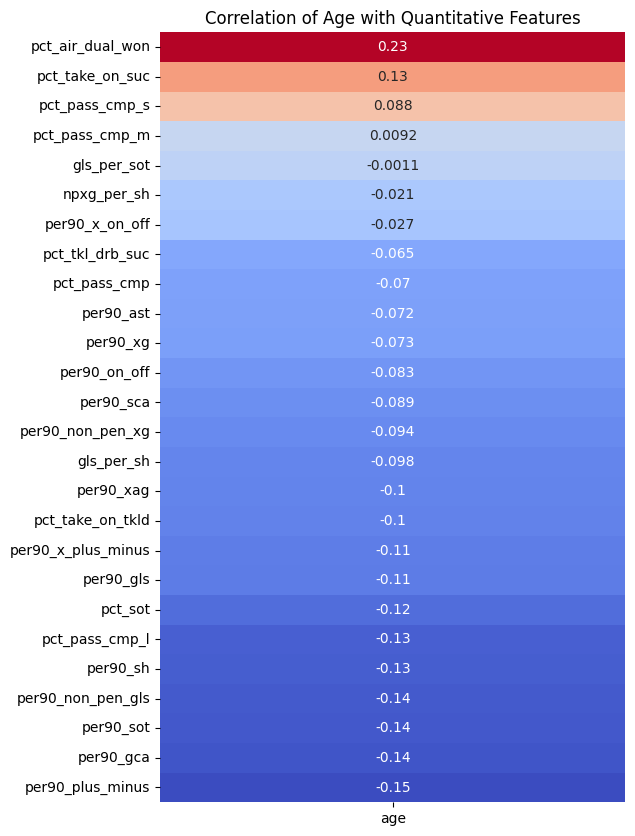

In [36]:
df_age_analysis = data_clean[id_cols + list(df_features.columns)]
df_age_analysis = df_age_analysis.dropna(subset=['age'])

# --- Correlation between age and quantitative features ---
corr_with_age = df_age_analysis.corr(numeric_only=True)['age'].sort_values(ascending=False)
corr_with_age = corr_with_age.drop('age')

plt.figure(figsize=(6, 10))
sns.heatmap(corr_with_age.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title("Correlation of Age with Quantitative Features")
plt.show()

The correlation heatmap shows that age has only weak relationships with most normalized performance metrics.  
Out of the 26 quantitative variables analyzed, only a few display a positive correlation with age — the highest being around 0.23 for *percentage of aerial duels won*.  
Such low coefficients (|r| < 0.3) indicate that player age does not systematically influence per-90 statistics such as shooting, passing, or chance creation.

Consequently, age will be treated as a descriptive variable — useful for interpreting clusters and player profiles, but excluded from the feature matrix used for dimensionality reduction and clustering.

## Handling Missing Values (NaN)

In football statistics, missing values rarely represent unavailable data — they usually mean that a player did not perform a certain type of action (e.g., no aerial duels, no shots).  

Therefore, missing values were treated contextually:
- Per-90 or rate-based statistics → replaced with 0 (no recorded event).
- Percentage or ratio-based features → imputed with the median value of the column.
- Columns with more than 10% missing data → dropped due to unreliability.

This preserves football semantics while ensuring statistical consistency for dimensionality reduction and clustering.

In [37]:
# for each column, check the percentage of missing values
missing_percentages = df_features.isna().mean() * 100

missing_percentages = missing_percentages[missing_percentages > 0]
missing_percentages.sort_values(ascending=False)
print("Percentage of missing values in each column:")
print(missing_percentages)

Percentage of missing values in each column:
pct_sot              7.584270
gls_per_sh           7.584270
gls_per_sot         13.764045
npxg_per_sh          7.584270
pct_tkl_drb_suc      0.842697
pct_take_on_suc      5.056180
pct_take_on_tkld     5.056180
per90_on_off         1.685393
per90_x_on_off       1.404494
pct_air_dual_won     0.561798
dtype: float64


In [38]:
# Imputation strategy based on football context
for col in df_features.columns:
    if missing_percentages.get(col, 0) > 10:
        df_features.drop(col, axis=1, inplace=True)
        print(f"Dropped column '{col}' ({missing_percentages[col]:.2f}% missing).")
    elif 'per90' in col or '_per_' in col:  # activity rate
        df_features[col] = df_features[col].fillna(0)
        print(f"Filled missing '{col}' with 0 (no recorded event).")
    elif 'pct_' in col:  # percentage or ratio
        imputer = SimpleImputer(strategy='median')
        df_features[col] = imputer.fit_transform(df_features[[col]])
        print(f"Imputed '{col}' with median ({imputer.statistics_[0]:.3f}).")


Filled missing 'per90_gls' with 0 (no recorded event).
Filled missing 'per90_ast' with 0 (no recorded event).
Filled missing 'per90_non_pen_gls' with 0 (no recorded event).
Filled missing 'per90_xg' with 0 (no recorded event).
Filled missing 'per90_xag' with 0 (no recorded event).
Filled missing 'per90_non_pen_xg' with 0 (no recorded event).
Imputed 'pct_sot' with median (34.300).
Filled missing 'per90_sh' with 0 (no recorded event).
Filled missing 'per90_sot' with 0 (no recorded event).
Filled missing 'gls_per_sh' with 0 (no recorded event).
Dropped column 'gls_per_sot' (13.76% missing).
Filled missing 'npxg_per_sh' with 0 (no recorded event).
Imputed 'pct_pass_cmp' with median (81.050).
Imputed 'pct_pass_cmp_s' with median (89.600).
Imputed 'pct_pass_cmp_m' with median (86.000).
Imputed 'pct_pass_cmp_l' with median (57.100).
Filled missing 'per90_sca' with 0 (no recorded event).
Filled missing 'per90_gca' with 0 (no recorded event).
Imputed 'pct_tkl_drb_suc' with median (52.600).
Imp

## Generating missing per 90 stats

To ensure consistency, we generate new per-90 versions for any brute quantitative column that lacks a per-90 counterpart.

In [39]:
data_clean.columns.tolist()

['equipe',
 'player_id',
 'player_name',
 'player_country_code',
 'age',
 'positions',
 'matches_played',
 'starts',
 'min',
 'gls',
 'ast',
 'gls_and_ast',
 'non_pen_gls',
 'xg',
 'non_pen_xg',
 'xag',
 'pk_made',
 'pk_att',
 'yellow_cards',
 'red_cards',
 'carries_prog',
 'passes_prog',
 'per90_gls',
 'per90_ast',
 'per90_non_pen_gls',
 'per90_xg',
 'per90_xag',
 'per90_non_pen_xg',
 'sh',
 'sot',
 'pct_sot',
 'per90_sh',
 'per90_sot',
 'gls_per_sh',
 'gls_per_sot',
 'avg_sh_dist',
 'fk_sh',
 'npxg_per_sh',
 'gls_xg_diff',
 'non_pen_gls_xg_diff',
 'pass_cmp',
 'pass_att',
 'pct_pass_cmp',
 'pass_ttl_dist',
 'pass_cmp_s',
 'pass_att_s',
 'pct_pass_cmp_s',
 'pass_cmp_m',
 'pass_att_m',
 'pct_pass_cmp_m',
 'pass_cmp_l',
 'pass_att_l',
 'pct_pass_cmp_l',
 'xa',
 'ast_xag_diff',
 'pass_prog',
 'pass_prog_ttl_dist',
 'key_passes',
 'pass_fthird',
 'pass_opp_box',
 'cross_opp_box',
 'pass_live',
 'pass_dead',
 'pass_fk',
 'through_balls',
 'switches',
 'crosses',
 'pass_offside',
 'pass_blo

In [40]:
cols_to_exclude = [
    'equipe', 'player_id', 'player_name', 'player_country_code',
    'age', 'positions', 'min', 'matches_played',
    'avg_sh_dist', 'pct_sot', 'gls_per_sh', 'gls_per_sot', 'npxg_per_sh', 'pct_pass_cmp', 'pct_pass_cmp_s', 'pct_pass_cmp_m', 'pct_pass_cmp_l', 'pct_tkl_drb_suc', 'pct_take_on_suc', 'pct_take_on_tkld', 'pct_air_dual_won'
]

# Re-detect brute columns
brute_candidates = [
    c for c in data_clean.columns
    if c not in cols_to_exclude
    and not c.startswith(('per90_', 'pct_', '_per_'))
]

generated_cols = []
dropped_cols = []

data_clean_test = data_clean.copy()

for col in brute_candidates:
    candidate_col = f"per90_{col}"
    if candidate_col in data_clean_test.columns:
        continue
    new_col = f"{col}_per90"
    if new_col not in data_clean.columns:
        data_clean_test[new_col] = 90 * data_clean_test[col] / data_clean_test['min']
        generated_cols.append(new_col)
        dropped_cols.append(col)

# Drop the original brute columns
data_clean_test.drop(columns=dropped_cols, inplace=True, errors='ignore')

print(f"✅ Generated {len(generated_cols)} new per-90 features.")
print(f"🗑️ Dropped {len(dropped_cols)} original brute columns.")

print(f"New features:", generated_cols)

✅ Generated 105 new per-90 features.
🗑️ Dropped 105 original brute columns.
New features: ['starts_per90', 'gls_and_ast_per90', 'pk_made_per90', 'pk_att_per90', 'yellow_cards_per90', 'red_cards_per90', 'carries_prog_per90', 'passes_prog_per90', 'fk_sh_per90', 'gls_xg_diff_per90', 'non_pen_gls_xg_diff_per90', 'pass_cmp_per90', 'pass_att_per90', 'pass_ttl_dist_per90', 'pass_cmp_s_per90', 'pass_att_s_per90', 'pass_cmp_m_per90', 'pass_att_m_per90', 'pass_cmp_l_per90', 'pass_att_l_per90', 'xa_per90', 'ast_xag_diff_per90', 'pass_prog_per90', 'pass_prog_ttl_dist_per90', 'key_passes_per90', 'pass_fthird_per90', 'pass_opp_box_per90', 'cross_opp_box_per90', 'pass_live_per90', 'pass_dead_per90', 'pass_fk_per90', 'through_balls_per90', 'switches_per90', 'crosses_per90', 'pass_offside_per90', 'pass_blocked_per90', 'throw_ins_per90', 'ck_per90', 'ck_in_swinger_per90', 'ck_out_swinger_per90', 'ck_straight_per90', 'ttl_sca_per90', 'pass_live_sca_per90', 'pass_dead_sca_per90', 'take_on_sca_per90', 'sh_

C:\Users\Josephir\AppData\Local\Temp\ipykernel_24992\3193409817.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_clean_test[new_col] = 90 * data_clean_test[col] / data_clean_test['min']
C:\Users\Josephir\AppData\Local\Temp\ipykernel_24992\3193409817.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_clean_test[new_col] = 90 * data_clean_test[col] / data_clean_test['min']
C:\Users\Josephir\AppData\Local\Temp\ipykernel_24992\3193409817.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

In [45]:
brute_stats_cols

['gls',
 'ast',
 'gls_and_ast',
 'xg',
 'gls_xg_diff',
 'pass_cmp',
 'pass_att',
 'pass_ttl_dist',
 'pass_cmp_s',
 'pass_att_s',
 'pass_cmp_m',
 'pass_att_m',
 'pass_cmp_l',
 'pass_att_l',
 'ast_xag_diff',
 'pass_prog',
 'pass_prog_ttl_dist',
 'pass_fthird',
 'pass_opp_box',
 'pass_live',
 'pass_dead',
 'pass_fk',
 'pass_offside',
 'pass_blocked',
 'pass_live_sca',
 'pass_dead_sca',
 'pass_live_gca',
 'pass_dead_gca',
 'tkl_won',
 'tkl_def_third',
 'tkl_mid_third',
 'tkl_att_third',
 'tkl_drb',
 'tkl_drb_att',
 'tkl_plus_int',
 'pass_recvd',
 'pass_prog_rcvd',
 'team_gls_on_pitch',
 'team_gls_ag_on_pitch',
 'team_xg_on_pitch',
 'team_xg_ag_on_pitch']

In [46]:
brute_candidates

['starts',
 'gls',
 'ast',
 'gls_and_ast',
 'non_pen_gls',
 'xg',
 'non_pen_xg',
 'xag',
 'pk_made',
 'pk_att',
 'yellow_cards',
 'red_cards',
 'carries_prog',
 'passes_prog',
 'sh',
 'sot',
 'fk_sh',
 'gls_xg_diff',
 'non_pen_gls_xg_diff',
 'pass_cmp',
 'pass_att',
 'pass_ttl_dist',
 'pass_cmp_s',
 'pass_att_s',
 'pass_cmp_m',
 'pass_att_m',
 'pass_cmp_l',
 'pass_att_l',
 'xa',
 'ast_xag_diff',
 'pass_prog',
 'pass_prog_ttl_dist',
 'key_passes',
 'pass_fthird',
 'pass_opp_box',
 'cross_opp_box',
 'pass_live',
 'pass_dead',
 'pass_fk',
 'through_balls',
 'switches',
 'crosses',
 'pass_offside',
 'pass_blocked',
 'throw_ins',
 'ck',
 'ck_in_swinger',
 'ck_out_swinger',
 'ck_straight',
 'ttl_sca',
 'pass_live_sca',
 'pass_dead_sca',
 'take_on_sca',
 'sh_sca',
 'fld_sca',
 'def_sca',
 'gca',
 'pass_live_gca',
 'pass_dead_gca',
 'take_on_gca',
 'sh_gca',
 'fld_gca',
 'def_gca',
 'tkl',
 'tkl_won',
 'tkl_def_third',
 'tkl_mid_third',
 'tkl_att_third',
 'tkl_drb',
 'tkl_drb_att',
 'blocks',


In [44]:
data_clean_test.drop(columns=brute_stats_cols, inplace=True, errors='ignore')
data_clean_test.columns.tolist()

['equipe',
 'player_id',
 'player_name',
 'player_country_code',
 'age',
 'positions',
 'matches_played',
 'min',
 'non_pen_gls',
 'non_pen_xg',
 'xag',
 'per90_gls',
 'per90_ast',
 'per90_non_pen_gls',
 'per90_xg',
 'per90_xag',
 'per90_non_pen_xg',
 'sh',
 'sot',
 'pct_sot',
 'per90_sh',
 'per90_sot',
 'gls_per_sh',
 'gls_per_sot',
 'avg_sh_dist',
 'npxg_per_sh',
 'pct_pass_cmp',
 'pct_pass_cmp_s',
 'pct_pass_cmp_m',
 'pct_pass_cmp_l',
 'per90_sca',
 'gca',
 'per90_gca',
 'pct_tkl_drb_suc',
 'pct_take_on_suc',
 'pct_take_on_tkld',
 'pct_squad_min',
 'per90_plus_minus',
 'per90_on_off',
 'per90_x_plus_minus',
 'per90_x_on_off',
 'pct_air_dual_won',
 'starts_per90',
 'gls_and_ast_per90',
 'pk_made_per90',
 'pk_att_per90',
 'yellow_cards_per90',
 'red_cards_per90',
 'carries_prog_per90',
 'passes_prog_per90',
 'fk_sh_per90',
 'gls_xg_diff_per90',
 'non_pen_gls_xg_diff_per90',
 'pass_cmp_per90',
 'pass_att_per90',
 'pass_ttl_dist_per90',
 'pass_cmp_s_per90',
 'pass_att_s_per90',
 'pass_c

In [42]:
# print of generated_cols stored in variable t
t = ['starts_per90', 'gls_and_ast_per90', 'pk_made_per90', 'pk_att_per90', 'yellow_cards_per90', 'red_cards_per90', 'carries_prog_per90', 'passes_prog_per90', 'fk_sh_per90', 'gls_xg_diff_per90', 'non_pen_gls_xg_diff_per90', 'pass_cmp_per90', 'pass_att_per90', 'pass_ttl_dist_per90', 'pass_cmp_s_per90', 'pass_att_s_per90', 'pass_cmp_m_per90', 'pass_att_m_per90', 'pass_cmp_l_per90', 'pass_att_l_per90', 'xa_per90', 'ast_xag_diff_per90', 'pass_prog_per90', 'pass_prog_ttl_dist_per90', 'key_passes_per90', 'pass_fthird_per90', 'pass_opp_box_per90', 'cross_opp_box_per90', 'pass_live_per90', 'pass_dead_per90', 'pass_fk_per90', 'through_balls_per90', 'switches_per90', 'crosses_per90', 'pass_offside_per90', 'pass_blocked_per90', 'throw_ins_per90', 'ck_per90', 'ck_in_swinger_per90', 'ck_out_swinger_per90', 'ck_straight_per90', 'ttl_sca_per90', 'pass_live_sca_per90', 'pass_dead_sca_per90', 'take_on_sca_per90', 'sh_sca_per90', 'fld_sca_per90', 'def_sca_per90', 'pass_live_gca_per90', 'pass_dead_gca_per90', 'take_on_gca_per90', 'sh_gca_per90', 'fld_gca_per90', 'def_gca_per90', 'tkl_per90', 'tkl_won_per90', 'tkl_def_third_per90', 'tkl_mid_third_per90', 'tkl_att_third_per90', 'tkl_drb_per90', 'tkl_drb_att_per90', 'blocks_per90', 'sh_blocked_per90', 'int_per90', 'tkl_plus_int_per90', 'clearances_per90', 'def_error_per90', 'touches_per90', 'touch_def_box_per90', 'touch_def_third_per90', 'touch_mid_third_per90', 'touch_fthird_per90', 'touch_opp_box_per90', 'touch_live_per90', 'take_on_att_per90', 'take_on_suc_per90', 'take_on_tkld_per90', 'carries_per90', 'ttl_carries_dist_per90', 'ttl_carries_prog_dist_per90', 'carries_fthird_per90', 'carries_opp_box_per90', 'carries_miscontrolled_per90', 'carries_dispossessed_per90', 'pass_recvd_per90', 'pass_prog_rcvd_per90', 'min_per_match_played_per90', 'avg_min_starter_per90', 'subs_per90', 'avg_min_sub_per90', 'unused_sub_per90', 'team_gls_on_pitch_per90', 'team_gls_ag_on_pitch_per90', 'team_xg_on_pitch_per90', 'team_xg_ag_on_pitch_per90', 'second_yellow_cards_per90', 'fls_com_per90', 'fls_drawn_per90', 'offside_per90', 'pk_won_per90', 'pk_conceded_per90', 'og_per90', 'ball_recov_per90', 'air_dual_won_per90', 'air_dual_lost_per90']
